# Preparing 1D Input File

Preparing matrix of 1D columns .nc file and formatting for input ecRad file.

Version 1: 2023-05-29

- cos_sza = 1
- Skin temperature as surface temperature.
- $\Delta T = 8^{\circ}C$ depth $\Rightarrow$ $h = 1.19$ $km$. Assuming a Lapse Rate of 6.7 $K/km$.
- Estimated IWP = IWC $\cdot$ h = IWMR $\cdot$ $\rho$ $\cdot$ h = 0.064 $g/kg$ $\cdot$ 1.3 $kg/m^{3}$ $\cdot$ 1.2 $km$ = 100 $g/m^{2}$ (IWMR = $6.4\times10^{-5}$ $kg/kg$)
- SW albedo = 0.3
- LW emissivity = 0.97

## Loading Libraries

Version list:

1. xarray : 2022.11.0
2. numpy : 1.23.4
3. pysolar : 0.10
4. matplotlib : 3.6.2

In [2]:
import os
import datetime as dt

import pandas as pd
import xarray as xr
import numpy as np
from scipy import interpolate
import pysolar.solar as ps

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker

# General Font to use in figures:
# (How to install new figure font?)
# import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['Arial']
# matplotlib.rcParams['font.family']     = 'sans-serif'

%matplotlib notebook

## Loading Data

In [3]:
tropical_profile = pd.read_csv('/home/u5/edgardo/p01_crh_sensitivity/tropical_profile_ellingson_250m.txt',
                               sep='\s+ ')

/tmp/ipykernel_62339/1624852093.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tropical_profile = pd.read_csv('/home/u5/edgardo/p01_crh_sensitivity/tropical_profile_ellingson_250m.txt',


In [4]:
temp            = tropical_profile['temperature (K)'].iloc[::-1]
tropopause_i    = temp.argmin()
tropopause      = temp.iloc[tropopause_i]
melting_layer_i = (temp - 273.15).abs().argmin()
melting_layer   = temp.iloc[melting_layer_i]

print(tropopause)

195.6


<IPython.core.display.Javascript object>


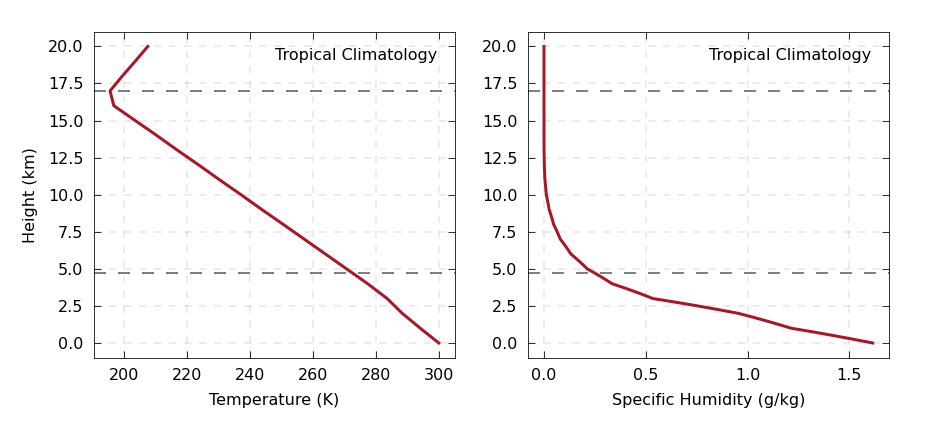

In [5]:
fontsize = 16
length   = 13 # inches
heigth   = length*.45 # inches
f, ax    = plt.subplots(1, 2, figsize=(length,heigth), dpi=72)
plt.subplots_adjust(top = 0.925, bottom = 0.15, left =0.1, right = 0.95,
                    hspace = .4, wspace = .2)

# === Subplot 1, 1: ===

h1 = ax[0].plot(tropical_profile['temperature (K)'], 
                tropical_profile['height (km)'],
                linestyle = 'solid', linewidth = 3,
                color = (169/255,23/255,38/255), alpha = 1,
                label = 'Tropical Temperature (K)')
melting_layer_h = tropical_profile['height (km)'].iloc[::-1].iloc[melting_layer_i]
h2 = ax[0].axhline(y = melting_layer_h, linestyle = 'dashed', color = 'grey',
                   dashes = (6, 6), linewidth  =2)
tropopause_h = tropical_profile['height (km)'].iloc[::-1].iloc[tropopause_i]
h3 = ax[0].axhline(y = tropopause_h, linestyle = 'dashed', color = 'grey',
                   dashes = (6, 6), linewidth  =2)

ax[0].grid('on', linestyle = 'dashed', color = 'grey',
           dashes = (25, 25), linewidth = .3)

# X Axis:
ax[0].set_xlabel('Temperature (K)', fontsize = fontsize,
                 color = 'black', labelpad = 10)
#major_ticks_x = np.arange(-60,60,3)
#minor_ticks_x = np.arange(-60,60,1)
#ax[0].set_xticks(major_ticks_x)
#ax[0].set_xticks(minor_ticks_x, minor=True)
#ax[0].set_xlim(300, 190)
ax[0].tick_params(axis = 'x', which = 'major', color = 'black',
                  size = 7, direction = 'in', top = True,
                  labelsize = fontsize, pad=10)
ax[0].tick_params(axis = 'x', which = 'minor',
                  color = 'black', size = 4,
                  direction = 'in', top = True)
    
# Y Axis:
ax[0].set_ylabel('Height (km)', fontsize = fontsize,
                 color = 'black', labelpad = 10)
#major_ticks_y = np.arange(0, 450, 15)
#minor_ticks_y = np.arange(0, 450, 5)
#ax.set_yticks(major_ticks_y)
#ax.set_yticks(minor_ticks_y, minor=True)
#ax[0].set_ylim(0,20)
ax[0].tick_params(axis = 'y', which = 'major', color = 'black',
                  size = 7, direction = 'in', right = True,
                  labelsize = fontsize, pad = 10)
ax[0].tick_params(axis = 'y', which = 'minor', color = 'black',
                  size = 4, direction = 'in', right = True)
        
# Additional Texts:
# ax.set_title('BOD Degradation over time',
#              fontsize=fontsize,
#              fontweight='bold',
#              color='black')
ax[0].text(0.95, 0.95, 'Tropical Climatology',
           ha = 'right', va = 'top', transform = ax[0].transAxes,
           fontsize = fontsize, color = 'black')


# === Subplot 1, 2: ===

h4 = ax[1].plot(tropical_profile['specific hum\t(kg/kg)']*100, 
                tropical_profile['height (km)'],
                linestyle = 'solid', linewidth = 3,
                color = (169/255,23/255,38/255), alpha = 1,
                label = 'Tropical Specific Humidity (g/kg)')
melting_layer_h = tropical_profile['height (km)'].iloc[::-1].iloc[melting_layer_i]
h5 = ax[1].axhline(y = melting_layer_h, linestyle = 'dashed', color = 'grey',
                   dashes = (6, 6), linewidth  =2)
tropopause_h = tropical_profile['height (km)'].iloc[::-1].iloc[tropopause_i]
h6 = ax[1].axhline(y = tropopause_h, linestyle = 'dashed', color = 'grey',
                   dashes = (6, 6), linewidth  =2)

ax[1].grid('on', linestyle = 'dashed', color = 'grey',
           dashes = (25, 25), linewidth = .3)

# X Axis:
ax[1].set_xlabel('Specific Humidity (g/kg)', fontsize = fontsize,
                 color = 'black', labelpad = 10)
#major_ticks_x = np.arange(-60,60,3)
#minor_ticks_x = np.arange(-60,60,1)
#ax[0].set_xticks(major_ticks_x)
#ax[0].set_xticks(minor_ticks_x, minor=True)
#ax[1].set_xlim(300, 190)
ax[1].tick_params(axis = 'x', which = 'major', color = 'black',
                  size = 7, direction = 'in', top = True,
                  labelsize = fontsize, pad=10)
ax[1].tick_params(axis = 'x', which = 'minor',
                  color = 'black', size = 4,
                  direction = 'in', top = True)
    
# Y Axis:
#ax[1].set_ylabel('Height (km)', fontsize = fontsize,
#                 color = 'black', labelpad = 10)
#major_ticks_y = np.arange(0, 450, 15)
#minor_ticks_y = np.arange(0, 450, 5)
#ax.set_yticks(major_ticks_y)
#ax.set_yticks(minor_ticks_y, minor=True)
#ax[1].set_ylim(0,20)
ax[1].tick_params(axis = 'y', which = 'major', color = 'black',
                  size = 7, direction = 'in', right = True,
                  labelsize = fontsize, pad = 10)
ax[1].tick_params(axis = 'y', which = 'minor', color = 'black',
                  size = 4, direction = 'in', right = True)
        
# Additional Texts:
# ax.set_title('BOD Degradation over time',
#              fontsize=fontsize,
#              fontweight='bold',
#              color='black')
ax[1].text(0.95, 0.95, 'Tropical Climatology',
           ha = 'right', va = 'top', transform = ax[1].transAxes,
           fontsize = fontsize, color = 'black')


#ax[1].legend(loc = 'upper right', fontsize=fontsize)


# Legend:
#handles = h1 + h2 + h3
#labels  = ['SW CRH','LW CRH','CHR']    
#legend  = plt.legend(handles, labels, loc = 'upper right',#bbox_to_anchor=(.675, 1.075),#
#                     ncol = 1, handlelength = 1.5, handletextpad = 1,
#                     labelspacing = .1, columnspacing = 2, numpoints = 1,
#                     frameon = False, prop = {'size':fontsize})

# Save Figure:
out_dir = ('/home/u5/edgardo/p01_crh_sensitivity/out_figures/')
#plt.savefig(out_dir+'tropical_climatology_sounding.png', dpi = 500)

Estimating Lapse Rate:

In [6]:
DT = tropical_profile['temperature (K)'][30] - tropical_profile['temperature (K)'][20]
Dh = tropical_profile['height (km)'][30] - tropical_profile['height (km)'][20]
slope = DT/Dh
print(slope)

-6.7


## Preparing input

List of parameters:

- Skin Temperature (for each temperature)
- cos_solar_zenith_angle (for each temperature)
- pressure_hl (half level column)
- temperature_hl (half level column)
- q or h2o_mmr (Specific Humidity) (level column)
- o3_mmr (Ozone Mass Mixing Ratio) (level column)
- q_liquid (Liquid cloud mass mixing ratio (kg kg-1)) (level column)
- q_ice (Ice cloud mass mixing ratio (kg kg-1)) (level column)
- re_liquid (m) (level column)
- re_ice (m) (level column)
- cloud_fraction (level column)
- sw_albedo (1 value)
- lw_emissivity (1 value)
- aerosol_mmr (matrix)

### 1. Half Level Pressures (Pa)

"The half_level dimension corresponds to the mid-points of the levels, plus the top-of-atmosphere and surface, and so must be one more than level"

In [7]:
pressure_hli = [tropical_profile['pressure (hPa)'].iloc[-1]*100] # Pa
for i in range(len(tropical_profile['pressure (hPa)'])-1):
    pif = tropical_profile['pressure (hPa)'].iloc[-1-(i+1)]*100
    pii = tropical_profile['pressure (hPa)'].iloc[-1-i]*100
    pressure_hli.append((pif+pii)/2)
pressure_hli.append(tropical_profile['pressure (hPa)'].iloc[0]*100) # Pa

### 2. Half Level Temperatures (K)

Interpolation obtained from half level pressures:

In [8]:
temp_int        = interpolate.interp1d(tropical_profile['pressure (hPa)'].iloc[::-1]*100,
                                       tropical_profile['temperature (K)'].iloc[::-1])
temperature_hli = temp_int(pressure_hli)

### 3. Matrix

Level of perturbation:

In [9]:
upper_limit_i = (temp.iloc[tropopause_i:] - 201).abs().argmin()
lower_limit_i = (temp.iloc[tropopause_i:] - 236).abs().argmin()
rows          = lower_limit_i - upper_limit_i + 1
temp_range    = temp.iloc[tropopause_i+upper_limit_i:tropopause_i+lower_limit_i+1].to_numpy()

In [10]:
temp_range

array([200.2 , 201.9 , 203.6 , 205.3 , 207.  , 208.7 , 210.4 , 212.05,
       213.7 , 215.35, 217.  , 218.7 , 220.4 , 222.1 , 223.8 , 225.45,
       227.1 , 228.75, 230.4 , 232.1 , 233.8 , 235.5 ])

In [11]:
cos_solar_zenith_angle = np.full(rows, 1)
lw_emissivity          = np.full(rows, .97)
sw_albedo              = np.full(rows, .3)
skin_temperature       = np.full(rows, temp.iloc[-1]) # (K)

# Specific humidity matrix (perturbations X level):
qi = tropical_profile['specific hum\t(kg/kg)'].iloc[::-1]
q  = np.full((rows,len(pressure_hli)-1),qi)

# Ozone mass mixing ratio matrix (perturbations X level):
o3_mmr = np.zeros((rows,len(pressure_hli)-1))

# Liquid cloud mass mixing ratio (perturbations X level):
q_liquid = np.zeros((rows,len(pressure_hli)-1))

# Ice cloud mass mixing ratio (perturbations X level):
q_ice = np.zeros((rows,len(pressure_hli)-1))

cloud_fraction = np.zeros((rows,len(pressure_hli)-1))

# CREATING THE PROFILE
for i in range(rows):
    ti = temp_range[i]
    for j in range(len(temp)):
        if j >= tropopause_i:
            tj = temp.iloc[j]
            if tj >= (ti - 4) and tj <= (ti + 4):
                q_ice[i,j] = 6.4e-5 # IWMR = 0.064 g/kg
                cloud_fraction[i,j] = 1

# Liquid cloud effective radius (m):
re_liquid = np.full((rows,len(pressure_hli)-1),1e-5)

# Ice cloud effective radius (m):
re_ice = np.full((rows,len(pressure_hli)-1),5e-5)

# Half Level Pressures (perturbations X half_level):
pressure_hl = np.full((rows,len(pressure_hli)),pressure_hli)

# Half Level Temperatures (perturbations X half_level):
temperature_hl = np.full((rows,len(pressure_hli)),temperature_hli)

In [12]:
q_ice[-1]

array([0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 6.4e-05, 6.4e-05, 6.4e-05, 6.4e-05, 6.4e-05,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00])

<IPython.core.display.Javascript object>


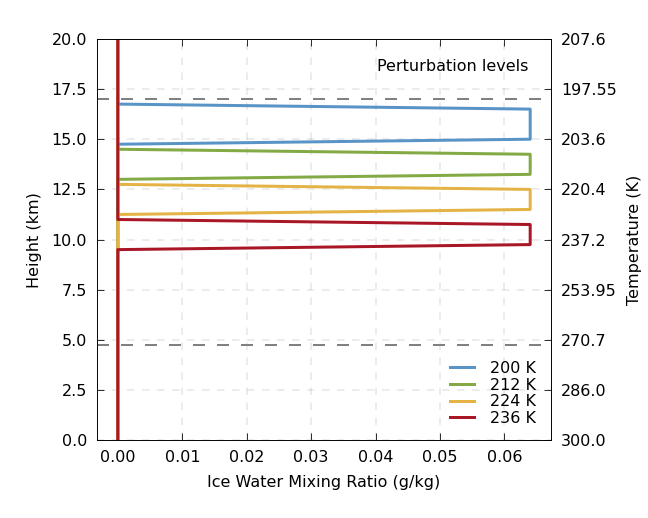

In [14]:
fontsize = 16
length   = 9 # inches
heigth   = length*.8 # inches
f, ax    = plt.subplots(figsize=(length,heigth), dpi=72)
plt.subplots_adjust(top = 0.925, bottom = 0.15, left =0.15, right = 0.85)

my_colors = [(88/255,148/255,197/255), (169/255,23/255,38/255),
             (229/255,179/255,69/255), (131/255,170/255,69/255),
             (116/255,24/255,123/255), (202/255,91/255,46/255),
             (107/255,188/255,233/255), 'grey']

h1 = ax.plot(q_ice[0]*1000, tropical_profile['height (km)'].iloc[::-1],
             linestyle = 'solid', linewidth = 3,
             color = my_colors[0], alpha = 1,
             label = '200 K perturbation level')
h2 = ax.plot(q_ice[7]*1000, tropical_profile['height (km)'].iloc[::-1],
             linestyle = 'solid', linewidth = 3,
             color = my_colors[3], alpha = 1,
             label = '212 K perturbation level')
h3 = ax.plot(q_ice[14]*1000, tropical_profile['height (km)'].iloc[::-1],
             linestyle = 'solid', linewidth = 3,
             color = my_colors[2], alpha = 1,
             label = '224 K perturbation level')
h4 = ax.plot(q_ice[-1]*1000, tropical_profile['height (km)'].iloc[::-1],
             linestyle = 'solid', linewidth = 3,
             color = my_colors[1], alpha = 1,
             label = '236 K perturbation level')
melting_layer_h = tropical_profile['height (km)'].iloc[::-1].iloc[melting_layer_i]
h5 = ax.axhline(y = melting_layer_h, linestyle = 'dashed', color = 'grey',
                dashes = (6, 6), linewidth  =2)
tropopause_h = tropical_profile['height (km)'].iloc[::-1].iloc[tropopause_i]
h6 = ax.axhline(y = tropopause_h, linestyle = 'dashed', color = 'grey',
                dashes = (6, 6), linewidth  =2)

ax.grid('on', linestyle = 'dashed', color = 'grey',
        dashes = (25, 25), linewidth = .3)

# X Axis:
ax.set_xlabel('Ice Water Mixing Ratio (g/kg)', fontsize = fontsize,
              color = 'black', labelpad = 10)
#major_ticks_x = np.arange(-60,60,3)
#minor_ticks_x = np.arange(-60,60,1)
#ax.set_xticks(major_ticks_x)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_xlim(300, 190)
ax.tick_params(axis = 'x', which = 'major', color = 'black',
               size = 7, direction = 'in', top = True,
               labelsize = fontsize, pad=10)
#ax.tick_params(axis = 'x', which = 'minor',
#               color = 'black', size = 4,
#               direction = 'in', top = True)
    
# Y Axis:
ax.set_ylabel('Height (km)', fontsize = fontsize,
              color = 'black', labelpad = 10)
#major_ticks_y = np.arange(-60,60,3)
#minor_ticks_y = np.arange(-60,60,1)
#ax.set_yticks(major_ticks_y)
#ax.set_yticks(minor_ticks_y, minor=True)
ax.set_ylim(0,20)
ax.tick_params(axis = 'y', which = 'major', color = 'black',
               size = 7, direction = 'in', right = True,
               labelsize = fontsize, pad = 10)
#ax.tick_params(axis = 'y', which = 'minor', color = 'black',
#               size = 4, direction = 'in', right = True)

# Right Y Axis:
ax2 = ax.twinx()
ax2.set_ylabel('Temperature (K)', fontsize = fontsize,
               color = 'black', labelpad = 10)
yticklabels1 = np.arange(0,22.5,2.5) # default altitude tick labels
yticklabels2 = tropical_profile['temperature (K)'].loc[tropical_profile['height (km)'].isin(yticklabels1)].to_list()    
ax2.set_yticks(yticklabels1)
ax2.set_yticklabels(yticklabels2)
ax2.tick_params(axis = 'y', which = 'major', color = 'black',
                size = 7, direction = 'in', right = True,
                labelsize = fontsize, pad = 10)

ax.text(0.95, 0.95, 'Perturbation levels',
        ha = 'right', va = 'top', transform = ax.transAxes,
        fontsize = fontsize, color = 'black')

# Legend:
handles = h1 + h2 + h3 + h4
labels  = ['200 K','212 K','224 K','236 K']    
legend  = plt.legend(handles, labels, loc = 'lower right',#bbox_to_anchor=(.675, 1.075),#
                     ncol = 1, handlelength = 1.5, handletextpad = 1,
                     labelspacing = .1, columnspacing = 2, numpoints = 1,
                     frameon = False, prop = {'size':fontsize})

# Save Figure:
out_dir = ('/home/u5/edgardo/p01_crh_sensitivity/out_figures/')
plt.savefig(out_dir+'1D_IWMR_diagram_v2.png', dpi = 500)

Edgardo's notes (2023-06-01):

- Why the 200 K level cloud is thicker than the rest? Can the vertical resolution of Temperature profile changes with height and therefore alter the final Cloud Heating Rate profile? Maybe is better to fix the geometrical cloud depth?.
- Check literature to establish "realistic" values of IWMR (and IWP) and effective radius.

### Final Table

In [89]:
ds = xr.Dataset(
    data_vars = dict(
        #time = (time),
        temp = (['column'], temp_range),
        #longitude = (['column'], longitude),
        lw_emissivity = (['column'], lw_emissivity),
        sw_albedo = (['column'], sw_albedo),
        skin_temperature = (['column'], skin_temperature),
        cos_solar_zenith_angle = (['column'], cos_solar_zenith_angle),
        pressure_hl = (['column','half_level'], pressure_hl),
        temperature_hl = (['column','half_level'], temperature_hl),
        q = (['column','level'], q),
        o3_mmr = (['column','level'], o3_mmr),
        q_liquid = (['column','level'], q_liquid),
        q_ice = (['column','level'], q_ice),
        re_liquid = (['column','level'], re_liquid),
        re_ice = (['column','level'], re_ice),
        cloud_fraction = (['column','level'], cloud_fraction),
    ),
    attrs = dict(
        title="1D columns matrix input for ecRad"),
)

In [90]:
out_dir = ('/groups/sylvia/ecrad_tests/ecrad_test_1/')
file    = '1D_matrix_test'
ds.to_netcdf(path = out_dir+'input_'+file+'_v2.nc')